# Give Me Some Credit
#### Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

https://www.kaggle.com/c/GiveMeSomeCredit

In [1]:
# Python version: Python 2
# import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# import supplementary visualizations code visuals.py
import visuals as vs

# pretty display for notebooks
%matplotlib inline

# load the datasets
data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")

# success - Display the five record
display(data.head(5))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Exploration

- SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse 
- RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits 
- Age: Age of borrower in years
- NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income
- MonthlyIncome: Monthly income
- NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.
- NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit
- NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.)


In [2]:
# information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [3]:
# drop the unnamed column
data = data.drop('Unnamed: 0', axis = 1)

# Success - Display the first record
display(data.head(5))

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# display a description of the dataset
display(data.describe())

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Implementation: Selecting Samples

In [5]:
# select three indices of your choice you wish to sample from the dataset
indices = [1000, 3000, 8000]

# create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of dataset:"
display(samples)

Chosen samples of dataset:


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.666949,56,0,0.185055,5700.0,7,0,0,0,0.0
1,0,0.930933,52,0,0.155650,9167.0,14,0,0,0,0.0
2,0,0.249163,53,0,0.494290,2801.0,9,0,2,0,0.0


### Visualize Feature Distributions

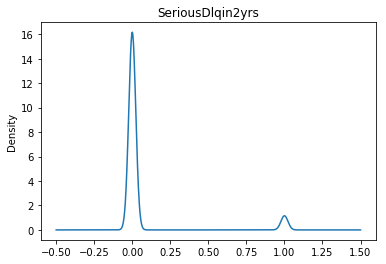

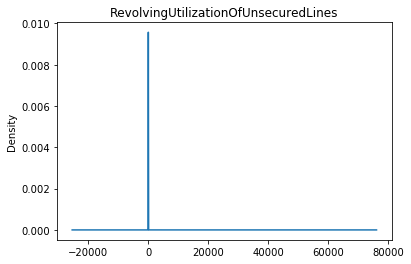

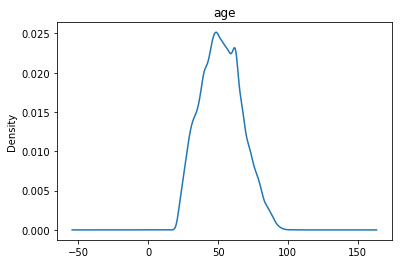

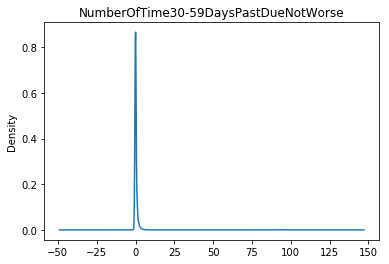

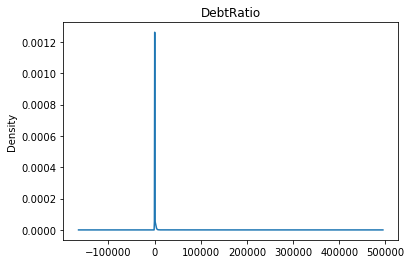

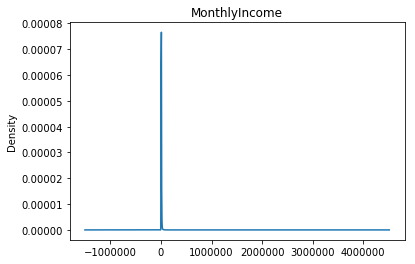

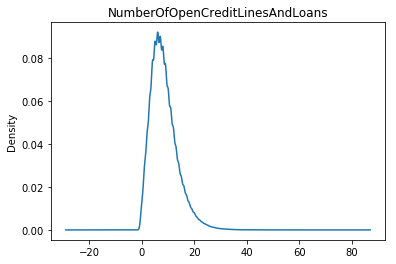

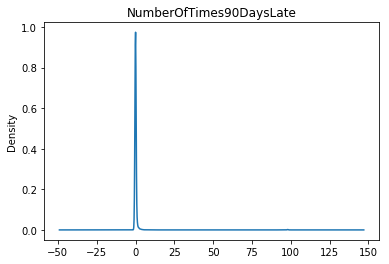

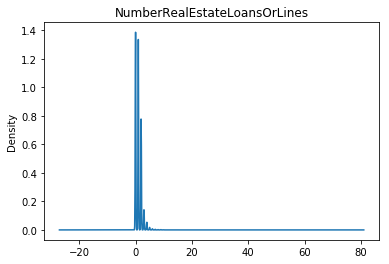

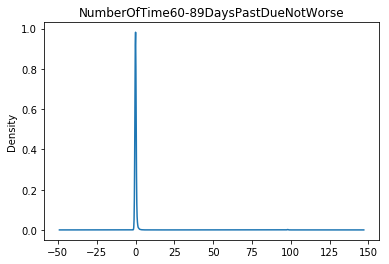

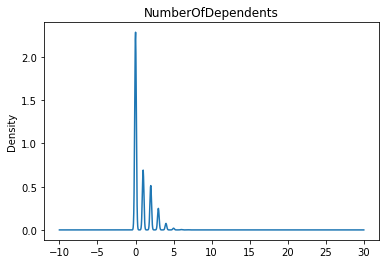

In [6]:
# univariate Density Plots
for feature in data:
    data[feature].plot(kind='density', title = feature)
    plt.show()

In [7]:
# skew for each attribute
skew = data.skew()
print(skew)

SeriousDlqin2yrs                          3.468857
RevolvingUtilizationOfUnsecuredLines     97.631574
age                                       0.188995
NumberOfTime30-59DaysPastDueNotWorse     22.597108
DebtRatio                                95.157793
MonthlyIncome                           114.040318
NumberOfOpenCreditLinesAndLoans           1.215314
NumberOfTimes90DaysLate                  23.087345
NumberRealEstateLoansOrLines              3.482484
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfDependents                        1.588242
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EA0208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000016B759B0>]], dtype=object)

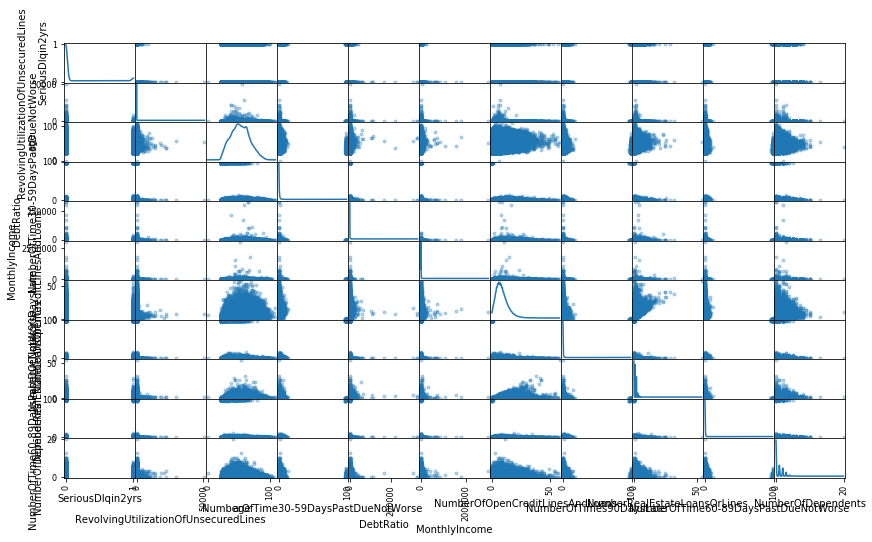

In [8]:
# produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

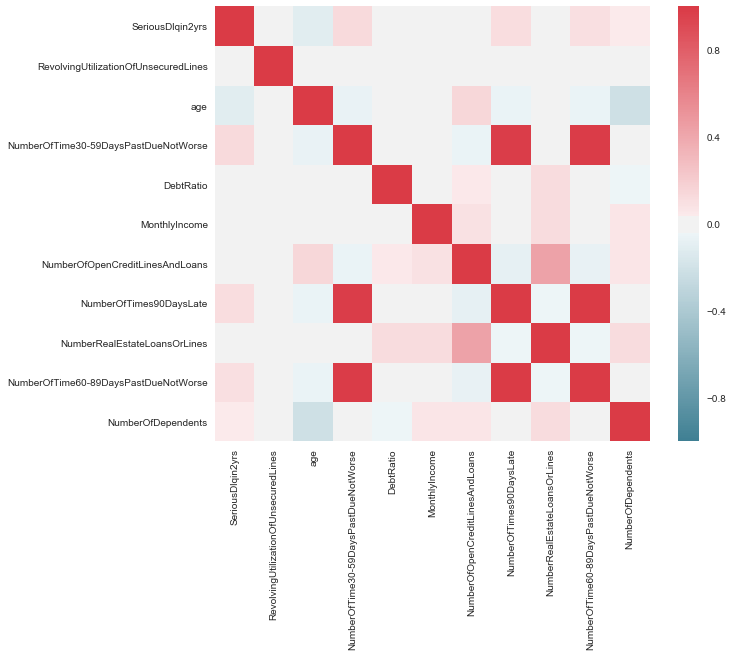

In [9]:
# create heat map
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Data Preprocessing


In [38]:
# split the data into features and target label
score = data['SeriousDlqin2yrs']
features = data.drop('SeriousDlqin2yrs', axis = 1)


In [39]:
features_list = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
                 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 
                 'NumberOfDependents']

In [40]:
# fill NAs with 0
features['MonthlyIncome'].fillna(0, inplace=True)
features['NumberOfDependents'].fillna(0, inplace=True)

# 
features.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


## Shuffle and Split Data

In [41]:
# import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


# split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, score, test_size = 0.2, random_state = 0)

# show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 120000 samples.
Testing set has 30000 samples.


## Evaluating Model Performance

### Initial Model Evaluation

In [42]:
# import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=42)
clf_C = LogisticRegression()

# collect results on the learners
for clf in [clf_A, clf_B, clf_C]:
    model = clf
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    report = classification_report(y_test, predicted)
    print clf, ": "
    print report

GaussianNB(priors=None) : 
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27957
          1       0.51      0.03      0.05      2043

avg / total       0.90      0.93      0.90     30000

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best') : 
             precision    recall  f1-score   support

          0       0.95      0.94      0.94     27957
          1       0.26      0.27      0.26      2043

avg / total       0.90      0.90      0.90     30000

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    

Although the Gaussian Naive Bayes and Logistic Regression algorithm have the same F1 Score, the Logistic Regression algorithm has a higher precision score, so I will be using it to train the model.

## Improving Results

### Feature Selection
The model has a higher accuracy without feature selection

In [43]:
# univariate feature selection: SelectKBest
from sklearn.feature_selection import SelectKBest
def select_k_best(features_data, label_data, features_list):
    clf = SelectKBest(k = 7)
    clf = clf.fit(features_data, label_data)
    features_weights = {}
    for index, feature in enumerate(clf.scores_):
        features_weights[features_list[1:][index]] = feature
    best_features = sorted(features_weights.items(), key = lambda k: k[1], reverse = True)[:13]
    new_features_list = []
    score_list = []
    for feature, score in best_features:
        new_features_list.append(feature)
        score_list.append(score)
        print feature, ": ", score
    return new_features_list, score_list

# full list of features
import pandas as pd
new_features_list, score_list = select_k_best(features, score, features_list)
select_k_best_table = pd.DataFrame({"Score": score_list}, index = new_features_list)
print "The features and feature scores:"
print select_k_best_table

NumberOfTime30-59DaysPastDueNotWorse :  2403.69255127
NumberOfTimes90DaysLate :  2088.12578295
age :  2023.99312911
NumberOfTime60-89DaysPastDueNotWorse :  1585.14798302
NumberOfDependents :  330.22660818
NumberOfOpenCreditLinesAndLoans :  132.148152775
MonthlyIncome :  26.6250452183
DebtRatio :  8.6692193074
NumberRealEstateLoansOrLines :  7.43053123564
RevolvingUtilizationOfUnsecuredLines :  0.486806779823
The features and feature scores:
                                            Score
NumberOfTime30-59DaysPastDueNotWorse  2403.692551
NumberOfTimes90DaysLate               2088.125783
age                                   2023.993129
NumberOfTime60-89DaysPastDueNotWorse  1585.147983
NumberOfDependents                     330.226608
NumberOfOpenCreditLinesAndLoans        132.148153
MonthlyIncome                           26.625045
DebtRatio                                8.669219
NumberRealEstateLoansOrLines             7.430531
RevolvingUtilizationOfUnsecuredLines     0.486807


In [44]:
# drop the unused features
# features2 = features.drop('DebtRatio', axis = 1)
# features2 = features2.drop('NumberRealEstateLoansOrLines', axis = 1)
# features2 = features2.drop('RevolvingUtilizationOfUnsecuredLines', axis = 1)

### Parameter Tuning

In [48]:
# Logistic Regression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# choose the type of classifier. 
clf = LogisticRegression()

# choose some parameter combinations to try
parameters = {'max_iter':(30, 40, 50)}

# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# fit the best algorithm to the data. 
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Selected the model: Logistic Regression

In [51]:
# TODO: Initialize the three models
clf = LogisticRegression(max_iter = 50)

# Collect results on the learners
model = clf
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print clf, ": "
print report

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) : 
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27957
          1       0.61      0.04      0.08      2043

avg / total       0.91      0.93      0.90     30000



### Cross Validation

In [52]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=20)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = features.values[train_index], features.values[test_index]
        y_train, y_test = score.values[train_index], score.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 


clf = LogisticRegression(max_iter = 50)
run_kfold(clf)

Fold 1 accuracy: 0.933333333333
Fold 2 accuracy: 0.933333333333
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.955555555556
Fold 5 accuracy: 0.866666666667
Fold 6 accuracy: 0.933333333333
Fold 7 accuracy: 0.955555555556
Fold 8 accuracy: 0.933333333333
Fold 9 accuracy: 0.955555555556
Fold 10 accuracy: 0.977777777778
Fold 11 accuracy: 0.933333333333
Fold 12 accuracy: 0.886363636364
Fold 13 accuracy: 0.977272727273
Fold 14 accuracy: 0.954545454545
Fold 15 accuracy: 0.909090909091
Fold 16 accuracy: 0.931818181818
Fold 17 accuracy: 0.977272727273
Fold 18 accuracy: 0.886363636364
Fold 19 accuracy: 1.0
Fold 20 accuracy: 0.931818181818
Mean Accuracy: 0.941616161616


### Make and Export the predictions

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [54]:
# fill NAs with 0
test_data['MonthlyIncome'].fillna(0, inplace=True)
test_data['NumberOfDependents'].fillna(0, inplace=True)

# info
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [55]:
ids = test_data['Unnamed: 0']

# drop the unnamed column
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.drop('SeriousDlqin2yrs', axis = 1)

# drop the unused features
# test_data = test_data.drop('DebtRatio', axis = 1)
# test_data = test_data.drop('NumberRealEstateLoansOrLines', axis = 1)
# test_data = test_data.drop('RevolvingUtilizationOfUnsecuredLines', axis = 1)


In [56]:
# make predictions
predictions = clf.predict_proba(test_data)

default_pred = []
for value in predictions:
    default_pred.append(value[1])
    
output = pd.DataFrame({ 'Id' : ids, 'Probability': default_pred })    

In [57]:
# preview the first 10 predictions
output.head(10)

,Id,Probability
0,1,0.028876
1,2,0.060157
2,3,0.035800
3,4,0.080564
4,5,0.067237
5,6,0.014664
6,7,0.036719
7,8,0.015738
8,9,0.010897
9,10,1.000000


In [58]:
# export the predictions to a csv file
output.to_csv('test_data_pred2.csv', index = False)